# This notebook is to analyse and discover relation between prescription costs of a practice against its patient list size.
## As part of the analysis - latest datasets of Dec 2017 are considered for both. The primary focus is whether the patient list can be used to correlate with the cost.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Area Q59 prescription cost versus patient list size analysis

In [2]:
# Presctiption Cost (filter from actual prescription cost data for Dec 17)
Q59PrescrptionData = pd.read_csv('./Q59_Costs.csv', sep=',', encoding = "ISO-8859-1")
Q59PrescrptionData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
0,C82001,14402,96306.93,89481.98,857459,299542320
1,C82002,11873,119906.55,111333.82,1068837,304383408
2,C82003,19968,126706.64,118177.38,1245757,341094992
3,C82005,15567,116893.35,108619.93,1241207,292885824
4,C82007,15529,142729.64,132746.63,1670355,340288144


In [3]:
# Patient list size (filter from actual patient list size data for Oct-Dec 17)
Q59PatientSizeData = pd.read_csv('./Q59_PatientListSizes.csv', sep=',', encoding = "ISO-8859-1")
Q59PatientSizeData.head()

,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,3066,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,BUSHLOE SURGERY,C82013,311,...,636,736,745,685,716,611,751,509,643,10808
1,3067,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,COUNTESTHORPE HEALTH CENTRE,C82002,302,...,654,773,808,708,718,651,705,403,499,10630
2,3068,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,COUNTY PRACTICE,C82042,318,...,720,897,890,759,794,729,773,509,623,11904
3,3069,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,EMPINGHAM MEDICAL CENTRE,C82044,166,...,396,453,562,463,469,462,512,308,355,6469
4,3070,MIDLANDS AND EAST OF ENGLAND,Y55,LEICESTERSHIRE & LINCOLNSHIRE AREA TEAM,Q59,EAST LEICESTERSHIRE AND RUTLAND CCG,03W00,ENDERBY MEDICAL CENTRE,C82631,248,...,453,468,490,369,336,248,225,128,165,6243


In [4]:
Q59PatientSlice = Q59PatientSizeData.loc[:, 'Practice Code':]

In [5]:
# Merge both prescription and patient list size data for Q59
Q59MergedData = Q59PrescrptionData.merge(Q59PatientSlice, left_on='PRACTICE', right_on='Practice Code', how='inner')
Q59MergedData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Practice Code,Male 0-4,Female 0-4,Male 5-14,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,C82001,14402,96306.93,89481.98,857459,299542320,C82001,265,242,622,...,634,770,788,615,646,538,580,355,470,9410
1,C82002,11873,119906.55,111333.82,1068837,304383408,C82002,302,285,618,...,654,773,808,708,718,651,705,403,499,10630
2,C82003,19968,126706.64,118177.38,1245757,341094992,C82003,303,318,640,...,709,879,859,677,733,570,621,510,649,11396
3,C82005,15567,116893.35,108619.93,1241207,292885824,C82005,311,317,598,...,626,580,677,492,492,372,398,242,362,9237
4,C82007,15529,142729.64,132746.63,1670355,340288144,C82007,249,252,515,...,614,815,766,685,630,628,637,386,437,9653


## Scatter plot of patient list vs cost with regression

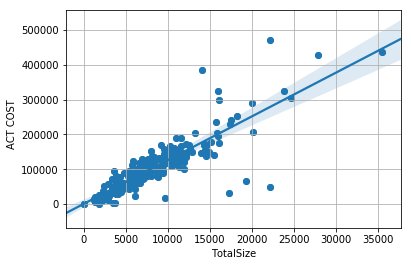

In [6]:
x = Q59MergedData['TotalSize']
y = Q59MergedData['ACT COST   ']
s = Q59MergedData['ACT COST   '].count() * 10 + Q59MergedData['ACT COST   '].max() + 100
ax = plt.gca()
ax.grid(True)
plt.scatter(x, y)
plt.xlabel("Practice Size")
plt.ylabel("Practice total cost")
sns.regplot(x='TotalSize', y='ACT COST   ', data=Q59MergedData)
plt.show()

### From the above graph its evident that they are practices which have higher or lower cost in comparision to regression line. These practices are of interest of the differences.

## Prescription cost vs Patient list size comparision at UK level
### The datasets are generated from the main datasets

In [10]:
# Prescription cost at UK level
UKPrescrptionCosts = pd.read_csv('./UK_PracticeCosts.csv', sep=',', encoding = "ISO-8859-1")
UKPrescrptionCosts.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
0,A81001,8012,62724.13,58415.88,701101,230153392
1,A81002,37730,303726.61,283142.36,2727979,437916752
2,A81004,17127,141415.65,131557.63,1389141,326773440
3,A81005,16155,106384.64,99121.44,917147,292684112
4,A81006,28565,205637.39,191342.94,1862637,370141520


In [11]:
# Practice lists at UK level
UKPracticeListTotals = pd.read_csv('./UK_PracticeListSize.csv', sep=',', encoding = "ISO-8859-1")
UKPracticeListTotals.head()

,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,...,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize,AvgAgeProfile
0,0,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,ABBEY MEDICAL CENTRE,F82625,305,...,499,392,275,188,134,120,74,86,6891,36.169496
1,1,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,BARKING MEDICAL GROUP PRACTICE,F82018,479,...,709,732,531,471,273,321,214,356,11558,38.965392
2,2,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,CHILD & FAMILY HEALTH CENTRE,Y02583,636,...,574,415,207,204,55,68,21,51,11037,32.228867
3,3,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A ARIF,F86040,181,...,347,219,185,162,88,99,67,84,4258,37.979803
4,4,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A MOGHAL'S PRACTICE,F82677,245,...,450,464,242,237,149,147,94,143,6299,37.785045


### Merge the data of costs and patient list

In [12]:
UKMergedData = UKPrescrptionCosts.merge(UKPracticeListTotals, left_on='PRACTICE', right_on='Practice Code', how='inner')
UKMergedData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,...,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize,AvgAgeProfile
0,A81001,8012,62724.13,58415.88,701101,230153392,4002,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,264,297,248,248,230,239,211,268,4144,48.535232
1,A81002,37730,303726.61,283142.36,2727979,437916752,3996,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,1436,1504,1437,1424,1086,1144,816,1178,19965,48.576709
2,A81004,17127,141415.65,131557.63,1389141,326773440,4047,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,657,576,636,579,461,467,377,536,9759,46.268470
3,A81005,16155,106384.64,99121.44,917147,292684112,4069,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,534,566,531,577,599,653,421,534,7993,51.836857
4,A81006,28565,205637.39,191342.94,1862637,370141520,4000,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,996,976,954,980,687,759,435,617,13956,45.966323


## Scatter plot of patient list vs cost with regression at UK level

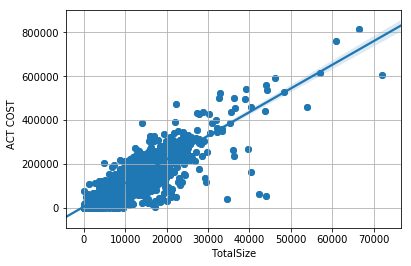

In [13]:
maxSize = UKMergedData['TotalSize'].max()
maxCost = UKMergedData['ACT COST   '].max()
x = UKMergedData['TotalSize']
y = UKMergedData['ACT COST   ']
s = maxCost * 10 + 100

ax = plt.gca()
ax.grid(True)

plt.scatter(x, y)
plt.xlabel("Practice Size")
plt.ylabel("Practice total cost")

sns.regplot(x='TotalSize', y='ACT COST   ', data=UKMergedData)

plt.show()

### From the above graph its evident that they are practices which have higher or lower cost in comparision to regression line. These practices are of interest of the differences.
### Specifically the number of practices of patient list between 0-10000 and 10000-~26500 are of interest.

In [14]:
UKMergedData.describe()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Male 0-4,Female 0-4,Male 5-14,Female 5-14,...,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize,AvgAgeProfile
count,7268.000000,7268.000000,7268.000000,7.268000e+03,7.268000e+03,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,...,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000,7268.000000
mean,12527.842323,99219.375158,92363.922943,9.652345e+05,2.668742e+08,3669.558613,233.864612,222.352229,483.533847,460.678866,...,581.546505,554.741057,468.736241,461.380848,372.948954,395.733489,269.428041,362.857182,8079.086819,45.365364
std,8671.485006,67286.830328,62609.161428,6.582170e+05,8.944495e+07,2112.210823,156.537537,148.872207,312.771970,297.837971,...,364.136179,361.212964,302.661886,309.617477,274.644217,297.464406,209.583850,285.926490,5095.901113,5.267410
min,1.000000,1.310000,1.330000,2.800000e+01,2.017120e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,25.005046
25%,6419.000000,50361.167500,46934.532500,4.876455e+05,2.041325e+08,1848.750000,124.000000,118.000000,264.000000,253.000000,...,320.000000,291.000000,249.000000,235.000000,168.000000,172.000000,113.000000,148.000000,4458.750000,42.067494
50%,10638.500000,86008.545000,79987.075000,8.299485e+05,2.656547e+08,3669.500000,202.000000,192.000000,428.000000,406.000000,...,514.000000,486.000000,411.000000,403.000000,310.000000,329.000000,220.000000,296.000000,7166.500000,45.724953
75%,16593.250000,133539.427500,124219.400000,1.300578e+06,3.279837e+08,5495.250000,306.000000,293.000000,635.000000,606.000000,...,766.000000,749.000000,625.000000,622.000000,514.000000,549.000000,373.000000,504.000000,10592.250000,48.775449
max,110047.000000,877130.610000,816097.540000,1.002940e+07,7.818357e+08,7326.000000,2063.000000,1946.000000,4236.000000,3998.000000,...,5333.000000,4667.000000,3975.000000,3827.000000,3380.000000,3566.000000,2514.000000,3504.000000,72151.000000,100.000000


### Based on the distribution of data, total number of practices are consideration is 7628.
### To decrease the data size, lets consider practices between 25% and 75% i.e. patient list between 4400 & 10600.
### The number of practices reduces to 1812

In [15]:
# Consider patient list size between 25% to 75% percentile
Percent25 = 4400
Percent75 = 10600
PatientSizeFilter1 = UKMergedData['TotalSize'] >= Percent25
PatientSizeFilter2 = UKMergedData['TotalSize'] <= Percent75
PatientSizeFilterData = UKMergedData[PatientSizeFilter1 & PatientSizeFilter2]
PatientSizeFilterData.head()

,PRACTICE,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0,Regional Office Name,Regional Office Code,Area Team Name,...,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize,AvgAgeProfile
2,A81004,17127,141415.65,131557.63,1389141,326773440,4047,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,657,576,636,579,461,467,377,536,9759,46.268470
3,A81005,16155,106384.64,99121.44,917147,292684112,4069,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,534,566,531,577,599,653,421,534,7993,51.836857
5,A81007,17030,130218.34,121393.84,1221708,298533760,3979,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,708,718,613,652,482,498,338,545,10034,46.129559
6,A81009,17320,122328.36,113875.23,1277437,307610800,4083,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,647,675,576,579,362,402,265,355,8843,44.689811
8,A81012,13349,86690.28,80906.77,899804,260813616,4084,NORTH OF ENGLAND,Y54,"DURHAM, DARLINGTON AND TEES AREA TEAM",...,351,307,325,309,179,157,140,174,4771,43.151960


## Scatter plot of patient list vs cost with regression (25% to 75% percentiles)

(3685, 35)


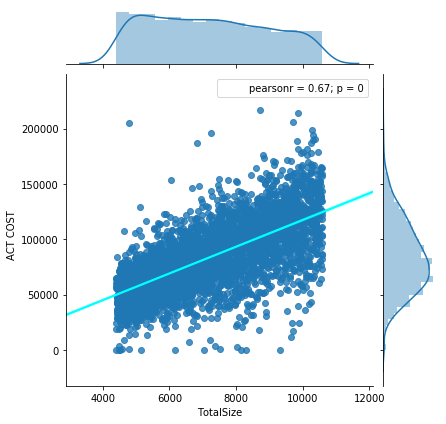

In [16]:
maxSize = PatientSizeFilterData['TotalSize'].max()
maxCost = PatientSizeFilterData['ACT COST   '].max()

sns.jointplot(x="TotalSize", y="ACT COST   ", data=PatientSizeFilterData, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})
print(PatientSizeFilterData.shape)
plt.show()

## Above graph validates the understanding that practices of size between 4400 & 10600 have higher difference in costs. Further analysis needs to be done to understand the reasons for these differences.

In [17]:
UKMergedData['PerPatient_NIC'] = UKMergedData['NIC        ']/UKMergedData['TotalSize']
UKMergedData['PerPatient_ActCost'] = UKMergedData['ACT COST   ']/UKMergedData['TotalSize']

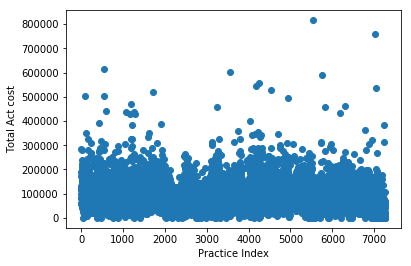

In [18]:
# Scatter plot of per-patient act cost for UK

x = np.arange(0, UKMergedData['ACT COST   '].count(), 1.0)
y = UKMergedData['ACT COST   ']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Total Act cost")
plt.show()

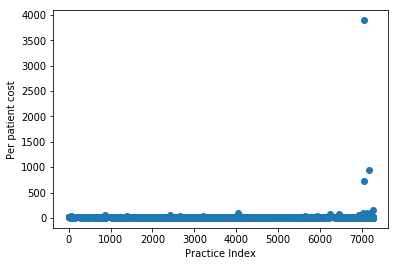

In [19]:
# Scatter plot of per-patient act cost for UK

x = np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = UKMergedData['PerPatient_ActCost']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Per patient cost")
plt.show()

In [20]:
# Define filters for per-patient act cost for UK
PerPFilter = UKMergedData['PerPatient_ActCost'] < 500

PerPFilter25 = UKMergedData['TotalSize'] >= Percent25
PerPFilter75 = UKMergedData['TotalSize'] <= Percent75

PerPFilterData = UKMergedData[PerPFilter & PerPFilter25 & PerPFilter75]

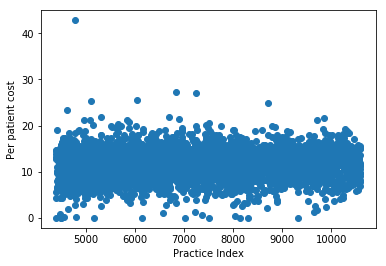

In [21]:
# Scatter plot of per-patient act cost for UK
x = PerPFilterData['TotalSize'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = PerPFilterData['PerPatient_ActCost']

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Per patient cost")
plt.show()

In [22]:
 UKMergedData['PerPatient_ActCost'].describe()

count    7268.000000
mean       12.357666
std        47.775240
min         0.000254
25%         9.425481
50%        11.683413
75%        13.602211
max      3892.912000
Name: PerPatient_ActCost, dtype: float64

In [23]:
# Load all GP Indicators
GP_Indicators = pd.read_csv('./PHE_GP_Indicators.csv', sep=',', encoding = "ISO-8859-1")

C:\Users\Shashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
GP_Indicators.columns

Index(['Unnamed: 0', 'Indicator ID', 'Indicator Name', 'Parent Code',
       'Parent Name', 'Area Code', 'Area Name', 'Area Type', 'Sex', 'Age',
       'Category Type', 'Category', 'Time period', 'Value',
       'Lower CI 95.0 limit', 'Upper CI 95.0 limit', 'Lower CI 99.8 limit',
       'Upper CI 99.8 limit', 'Count', 'Denominator', 'Value note',
       'Recent Trend', 'Compared to England value or percentiles',
       'Compared to subnational parent value or percentiles',
       'Time period Sortable'],
      dtype='object')

In [25]:
GP_Indicators['Time period'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, '2016', '2017',
       '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16',
       '2016/17', '2015', '2010', '2011', '2012', '2009/10', '2006 - 10',
       '2008 - 12', '2010 - 14'], dtype=object)

In [26]:
# GP_Indicators filters
GPFilter = GP_Indicators['Area Type'] == 'GP'
GP_IMD_2k15_Filter = GP_Indicators['Indicator Name'] == 'Deprivation score (IMD 2015)' 
GP_65Plus_Filter = GP_Indicators['Indicator Name'] ==  '% aged 65+ years'


In [27]:
GP_65Plus_Data = GP_Indicators[GP_65Plus_Filter]
GP_IMD_2k15_Data = GP_Indicators[GP_IMD_2k15_Filter]

In [28]:
GP_65PlusData_2017Filter = GP_65Plus_Data['Time period'] == 2017

In [29]:
GP_65Plus_Data_2017 = GP_65Plus_Data[GP_65PlusData_2017Filter]

In [30]:
GP_65Plus_Data_2017.shape

(7308, 25)

In [31]:
Features = ['Area Code', 'Indicator Name', 'Value']
GP_65Plus_Selected = GP_65Plus_Data_2017[Features]
GP_IMD_2k15_Selected = GP_IMD_2k15_Data[Features]

In [32]:
GP_65Plus_Selected.to_csv("GP_65Plus_Data.csv", sep=',')

## PHE Diabetes indicators

In [33]:
# Import diabetes indicators data
diabeticIndicatorsData = pd.read_csv('..\..\..\..\MAIN_PROJECT\Data\PHE\DiabetesProfileIndicators.csv', sep=',', encoding = "ISO-8859-1")

C:\Users\Shashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
selectedFeatures = ['Area Code', 'Indicator ID', 'Indicator Name', 'Time period', 'Count']

In [35]:

diabeticIndicatorsSelectedData = diabeticIndicatorsData[selectedFeatures]

In [36]:
IndicatorFilter = diabeticIndicatorsSelectedData['Indicator ID'] == 241
TimePeriodFilter = diabeticIndicatorsSelectedData['Time period'] == '2016/17'

In [37]:
diabeticIndicators2017 = diabeticIndicatorsSelectedData[IndicatorFilter & TimePeriodFilter]

In [38]:
diabeticIndicators2017.head

<bound method NDFrame.head of        Area Code  Indicator ID                  Indicator Name Time period  \
52802  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52803  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52804  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52805  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52806  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52807  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52808  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52809  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52810  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52811  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52812  E92000001           241  Diabetes: QOF prevalence (17+)     2016/17   
52813  E92000001           241  Di

In [3]:
# Import CVD indicators data
cvdIndicatorsData = pd.read_csv('..\..\..\..\MAIN_PROJECT\Data\PHE\CVD-RiskfactorsforCVD.Data.csv', sep=',', encoding = "ISO-8859-1")

C:\Users\Shashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cvdIndicatorFilter = cvdIndicatorsData['Indicator ID'] == 219
cvdTimePeriodFilter = cvdIndicatorsData['Time period'] == '2016/17'

In [6]:
cvdIndicators2017 = cvdIndicatorsData[cvdIndicatorFilter & cvdTimePeriodFilter]

In [9]:
cvdIndicatorsSelectedData = cvdIndicators2017[selectedFeatures]

In [39]:
UKMergedDataSelected = UKMergedData.merge(GP_65Plus_Selected, left_on='PRACTICE', right_on='Area Code', how='inner')
UKMergedDataSelected = UKMergedDataSelected.merge(diabeticIndicators2017, left_on='PRACTICE', right_on='Area Code', how='inner')
UKMergedDataSelected = UKMergedDataSelected.merge(cvdIndicatorsSelectedData, left_on='PRACTICE', right_on='Area Code', how='inner')
UKMergedDataSelected = UKMergedDataSelected.merge(GP_IMD_2k15_Selected, left_on='PRACTICE', right_on='Area Code', how='inner')
UKMergedDataSelected.describe()
UKMergedDataSelected.head

<bound method NDFrame.head of      PRACTICE  ITEMS    NIC          ACT COST     QUANTITY     PERIOD  \
0      A81001     8012     62724.13     58415.88    701101  230153392   
1      A81002    37730    303726.61    283142.36   2727979  437916752   
2      A81004    17127    141415.65    131557.63   1389141  326773440   
3      A81005    16155    106384.64     99121.44    917147  292684112   
4      A81006    28565    205637.39    191342.94   1862637  370141520   
5      A81007    17030    130218.34    121393.84   1221708  298533760   
6      A81009    17320    122328.36    113875.23   1277437  307610800   
7      A81011    23081    184051.47    171399.01   1752806  329799120   
8      A81012    13349     86690.28     80906.77    899804  260813616   
9      A81013    13483     86234.48     80246.78    766382  269688944   
10     A81014     8951     67202.83     62558.09    513049  258191360   
11     A81015     6160     43455.01     40460.42    408646  184969904   
12     A81016    1774

In [40]:
UKMergedDataSelected.columns

Index(['PRACTICE', 'ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY',
       'PERIOD', 'Unnamed: 0', 'Regional Office Name', 'Regional Office Code',
       'Area Team Name', 'Area Team Code', 'PCO Name', 'PCO Code',
       'Practice Name', 'Practice Code', 'Male 0-4', 'Female 0-4', 'Male 5-14',
       'Female 5-14', 'Male 15-24', 'Female 15-24', 'Male 25-34',
       'Female 25-34', 'Male 35-44', 'Female 35-44', 'Male 45-54',
       'Female 45-54', 'Male 55-64', 'Female 55-64', 'Male 65-74',
       'Female 65-74', 'Male 75+', 'Female 75+', 'TotalSize', 'AvgAgeProfile',
       'PerPatient_NIC', 'PerPatient_ActCost', 'Area Code_x',
       'Indicator Name_x', 'Value_x', 'Area Code_y', 'Indicator ID_x',
       'Indicator Name_y', 'Time period_x', 'Count_x', 'Area Code_x',
       'Indicator ID_y', 'Indicator Name_x', 'Time period_y', 'Count_y',
       'Area Code_y', 'Indicator Name_y', 'Value_y'],
      dtype='object')

In [41]:
UKMergedDataSelected.to_csv("UKMergedDataSelected.csv", sep=',')

In [23]:
# IMD indicators for GP from PHE
#GP_IMD2k15 = pd.read_csv('./PHE_GP_IMD_2k15_Indicators.csv', sep=',', encoding = "ISO-8859-1")
#GP_IMD2k15.head()

,Unnamed: 0,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,...,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to subnational parent value or percentiles,Time period Sortable
0,399501,91872,Deprivation score (IMD 2015),E38000075,NHS Hartlepool And Stockton-On-Tees CCG,A81001,The Densham Surgery,GP,Persons,All ages,...,NaN,NaN,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20150000
1,399502,91872,Deprivation score (IMD 2015),E38000075,NHS Hartlepool And Stockton-On-Tees CCG,A81002,Queens Park Medical Centre,GP,Persons,All ages,...,NaN,NaN,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20150000
2,399503,91872,Deprivation score (IMD 2015),E38000162,NHS South Tees CCG,A81004,Woodlands Road Surgery,GP,Persons,All ages,...,NaN,NaN,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20150000
3,399504,91872,Deprivation score (IMD 2015),E38000162,NHS South Tees CCG,A81005,Springwood Surgery,GP,Persons,All ages,...,NaN,NaN,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20150000
4,399505,91872,Deprivation score (IMD 2015),E38000075,NHS Hartlepool And Stockton-On-Tees CCG,A81006,Tennant Street Medical Practice,GP,Persons,All ages,...,NaN,NaN,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20150000


In [24]:
UKMergedDataWithIMD = UKMergedData.merge(GP_IMD2k15, left_on='PRACTICE', right_on='Area Code', how='inner')
UKMergedDataWithIMD.describe()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Unnamed: 0_x,Male 0-4,Female 0-4,Male 5-14,Female 5-14,...,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Time period Sortable
count,7156.000000,7156.000000,7156.000000,7.156000e+03,7.156000e+03,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,...,7156.0,7156.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7156.0
mean,12634.411543,99972.383586,93065.048998,9.718915e+05,2.686545e+08,3680.070151,235.595165,223.947317,487.170766,464.164058,...,2015.0,23.605972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0
std,8656.863290,67055.608927,62394.344914,6.560590e+05,8.761566e+07,2111.370294,156.162183,148.512670,311.777617,296.973607,...,0.0,11.889624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.000000,1.310000,1.330000,2.800000e+01,2.017120e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,2015.0,3.233126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0
25%,6506.000000,51207.730000,47728.360000,4.963168e+05,2.059480e+08,1880.750000,126.000000,119.000000,267.750000,255.000000,...,2015.0,13.836040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0
50%,10734.000000,86622.315000,80669.080000,8.352655e+05,2.663607e+08,3690.500000,203.000000,193.000000,430.000000,409.000000,...,2015.0,21.650779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0
75%,16661.000000,134262.360000,124931.657500,1.307747e+06,3.289923e+08,5500.250000,308.000000,294.250000,637.000000,610.250000,...,2015.0,31.596743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0
max,110047.000000,877130.610000,816097.540000,1.002940e+07,7.818357e+08,7326.000000,2063.000000,1946.000000,4236.000000,3998.000000,...,2015.0,66.489258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150000.0


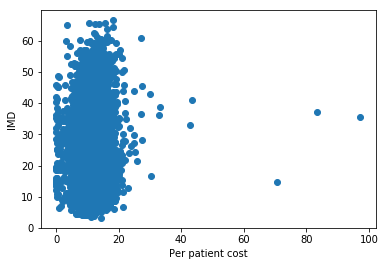

In [25]:
# Scatter plot of per-patient act cost for UK
x = UKMergedDataWithIMD['PerPatient_ActCost'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = UKMergedDataWithIMD['Value']

plt.scatter(x, y)
plt.xlabel("Per patient cost")
plt.ylabel("IMD")
plt.show()

In [26]:
PerPFilter_IMD = UKMergedDataWithIMD['PerPatient_ActCost'] < 500
PerPFilter25_IMD = UKMergedDataWithIMD['TotalSize'] >= Percent25
PerPFilter75_IMD = UKMergedDataWithIMD['TotalSize'] <= Percent75
PerPFilterDataWithIMD = UKMergedDataWithIMD[PerPFilter_IMD & PerPFilter25_IMD & PerPFilter75_IMD]

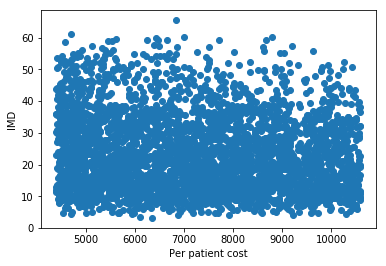

In [27]:
# Scatter plot of per-patient act cost for UK between 25% and 75%
x = PerPFilterDataWithIMD['TotalSize'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = PerPFilterDataWithIMD['Value']

plt.scatter(x, y)
plt.xlabel("Per patient cost")
plt.ylabel("IMD")
plt.show()

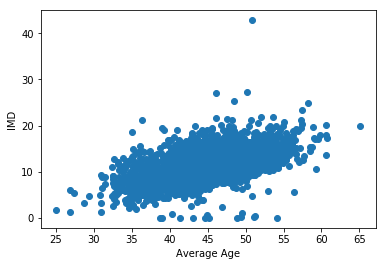

In [29]:
# Scatter plot of IMD against age profile
x = PerPFilterDataWithIMD['AvgAgeProfile'] #np.arange(0, UKMergedData['PerPatient_ActCost'].count(), 1.0)
y = PerPFilterDataWithIMD['PerPatient_ActCost']

plt.scatter(x, y)
plt.xlabel("Average Age")
plt.ylabel("IMD")
plt.show()

In [21]:
PerPFilterDataWithIMD.columns

Index(['PRACTICE', 'ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY',
       'PERIOD', 'Unnamed: 0_x', 'Regional Office Name',
       'Regional Office Code', 'Area Team Name', 'Area Team Code', 'PCO Name',
       'PCO Code', 'Practice Name', 'Practice Code', 'Male 0-4', 'Female 0-4',
       'Male 5-14', 'Female 5-14', 'Male 15-24', 'Female 15-24', 'Male 25-34',
       'Female 25-34', 'Male 35-44', 'Female 35-44', 'Male 45-54',
       'Female 45-54', 'Male 55-64', 'Female 55-64', 'Male 65-74',
       'Female 65-74', 'Male 75+', 'Female 75+', 'TotalSize', 'PerPatient_NIC',
       'PerPatient_ActCost', 'Unnamed: 0_y', 'Indicator ID', 'Indicator Name',
       'Parent Code', 'Parent Name', 'Area Code', 'Area Name', 'Area Type',
       'Sex', 'Age', 'Category Type', 'Category', 'Time period', 'Value',
       'Lower CI 95.0 limit', 'Upper CI 95.0 limit', 'Lower CI 99.8 limit',
       'Upper CI 99.8 limit', 'Count', 'Denominator', 'Value note',
       'Recent Trend', 'Compared to England val

In [31]:
from mpl_toolkits.mplot3d import Axes3D

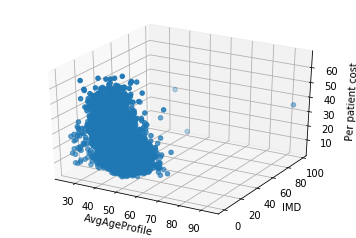

In [34]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(UKMergedDataWithIMD['AvgAgeProfile'], UKMergedDataWithIMD['PerPatient_ActCost'], UKMergedDataWithIMD['Value'])
threedee.set_xlabel('AvgAgeProfile')
threedee.set_ylabel('IMD')
threedee.set_zlabel('Per patient cost')
plt.show()

In [ ]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(PerPFilterDataWithIMD['TotalSize'], PerPFilterDataWithIMD['PerPatient_ActCost'], PerPFilterDataWithIMD['Value'])
threedee.set_xlabel('TotalSize')
threedee.set_ylabel('IMD')
threedee.set_zlabel('Per patient cost')
plt.show()

#reference : https://plot.ly/pandas/3d-scatter-plots/
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(PerPFilterDataWithIMD['PRACTICE'].unique())):
    name = PerPFilterDataWithIMD['PRACTICE'].unique()[i]
    x = PerPFilterDataWithIMD[PerPFilterDataWithIMD['PRACTICE'] == name]['Value']
    y = PerPFilterDataWithIMD[PerPFilterDataWithIMD['PRACTICE'] == name]['PerPatient_ActCost']
    z = PerPFilterDataWithIMD[PerPFilterDataWithIMD['PRACTICE'] == name]['TotalSize']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Dataset correlation',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
#py.iplot(fig, filename='pandas-3d-iris', validate=False)

url = py.plot(fig, filename='pandas-3d-correlation', validate=False)

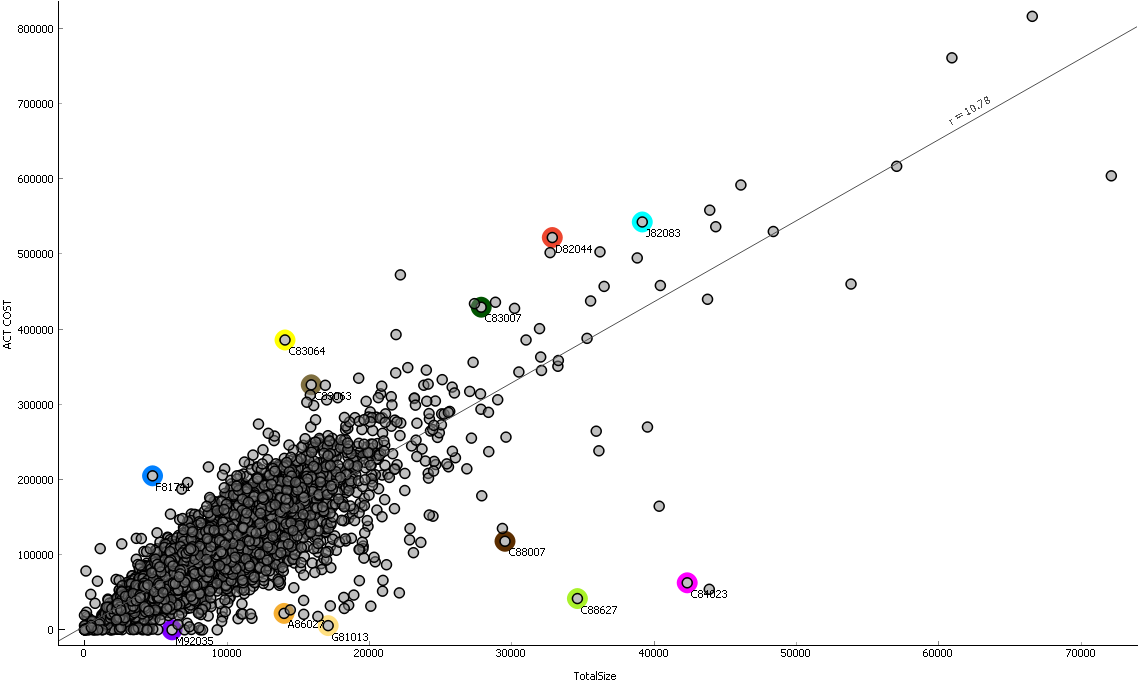

In [43]:
from IPython.display import Image
Image("insights/GP_Costs_vs_TotalSize_sample.png")

In [54]:
PracticeCode1 = 'F81741' #'C83079''C83064'#
PracticeCode2 = 'M92035'#'C83633''C83007'#
P1Filter = PerPFilterDataWithIMD['PRACTICE'] == PracticeCode1
P2Filter = PerPFilterDataWithIMD['PRACTICE'] == PracticeCode2
P1Data = PerPFilterDataWithIMD[P1Filter]
P2Data = PerPFilterDataWithIMD[P2Filter]

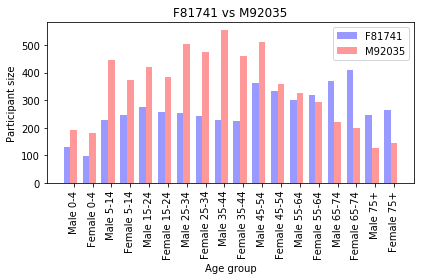

In [56]:
# VIEW PRACTICE AGE GROUPS SIDE BY SIDE
#referred : https://matplotlib.org/gallery/statistics/barchart_demo.html

import numpy as np
import matplotlib.pyplot as plt

n_groups = 18

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, P1Data[P1Data.columns[15:33]].values[0], bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label= PracticeCode1)

rects2 = ax.bar(index + bar_width, P2Data[P2Data.columns[15:33]].values[0], bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label= PracticeCode2)

#rects3 = ax.bar(index + bar_width * 2, AreaMean.values, bar_width,
#                alpha=opacity, color='g',
#                error_kw=error_config,
#                label= 'UK')

ax.set_xlabel('Age group')
ax.set_ylabel('Participant size')
ax.set_title(PracticeCode1 + ' vs ' + PracticeCode2) #  + ' vs ' + 'UK')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(P1Data.columns[15:33], rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

In [45]:
PerPFilterDataWithIMD.columns

Index(['PRACTICE', 'ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY',
       'PERIOD', 'Unnamed: 0_x', 'Regional Office Name',
       'Regional Office Code', 'Area Team Name', 'Area Team Code', 'PCO Name',
       'PCO Code', 'Practice Name', 'Practice Code', 'Male 0-4', 'Female 0-4',
       'Male 5-14', 'Female 5-14', 'Male 15-24', 'Female 15-24', 'Male 25-34',
       'Female 25-34', 'Male 35-44', 'Female 35-44', 'Male 45-54',
       'Female 45-54', 'Male 55-64', 'Female 55-64', 'Male 65-74',
       'Female 65-74', 'Male 75+', 'Female 75+', 'TotalSize', 'PerPatient_NIC',
       'PerPatient_ActCost', 'Unnamed: 0_y', 'Indicator ID', 'Indicator Name',
       'Parent Code', 'Parent Name', 'Area Code', 'Area Name', 'Area Type',
       'Sex', 'Age', 'Category Type', 'Category', 'Time period', 'Value',
       'Lower CI 95.0 limit', 'Upper CI 95.0 limit', 'Lower CI 99.8 limit',
       'Upper CI 99.8 limit', 'Count', 'Denominator', 'Value note',
       'Recent Trend', 'Compared to England val

In [53]:
P2Data[P2Data.columns[15:33]].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [35]:
UKMergedDataWithIMD.columns

Index(['PRACTICE', 'ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY',
       'PERIOD', 'Unnamed: 0_x', 'Regional Office Name',
       'Regional Office Code', 'Area Team Name', 'Area Team Code', 'PCO Name',
       'PCO Code', 'Practice Name', 'Practice Code', 'Male 0-4', 'Female 0-4',
       'Male 5-14', 'Female 5-14', 'Male 15-24', 'Female 15-24', 'Male 25-34',
       'Female 25-34', 'Male 35-44', 'Female 35-44', 'Male 45-54',
       'Female 45-54', 'Male 55-64', 'Female 55-64', 'Male 65-74',
       'Female 65-74', 'Male 75+', 'Female 75+', 'TotalSize', 'AvgAgeProfile',
       'PerPatient_NIC', 'PerPatient_ActCost', 'Unnamed: 0_y', 'Indicator ID',
       'Indicator Name', 'Parent Code', 'Parent Name', 'Area Code',
       'Area Name', 'Area Type', 'Sex', 'Age', 'Category Type', 'Category',
       'Time period', 'Value', 'Lower CI 95.0 limit', 'Upper CI 95.0 limit',
       'Lower CI 99.8 limit', 'Upper CI 99.8 limit', 'Count', 'Denominator',
       'Value note', 'Recent Trend',
       

In [36]:
UKMergedDataWithIMD.drop(['PERIOD', 'Unnamed: 0_x', 'Regional Office Name', 'Regional Office Code',  'Unnamed: 0_y', 'Time period', 'Lower CI 95.0 limit', 'Upper CI 95.0 limit', 'Lower CI 99.8 limit', 'Upper CI 99.8 limit', 'Time period Sortable'], axis=1, inplace=True)

In [37]:
UKMergedDataWithIMD.to_csv("UKMergedDataWithIMD.csv", sep=',')